<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_modeleval_sup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Evaluation

There are many ways to assess the predictive performance of a machine learning model. In this notebook, we discuss some evaluation metrics for classification and regression tasks.


# Evaluation Metrics for Classification

## Confusion matrix

For classification tasks, several evaluation metrics can be computed from entries coming from a *confusion matrix*.

A confusion matrix is ​​a tabular structure that presents a summary of the results produced by a classification model on a dataset.

The image below shows schematically a confusion matrix for a binary classification model.

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Confusion_Matrix1_1.png)

The diagonal elements of a confusion matrix represent the number of instances for which the class predicted by the model is equal to the true class (aka *golden truth*). These are the true positives (TP) and true negatives (TN). The higher the diagonal values ​​of the confusion matrix, the better. The elements outside the diagonal are those that were classified incorrectly. These are the false negatives (FN) and false positives (FP).

In Scikit-Learn, the function `confusion_matrix` produces a confusion matrix. This function expects to receive two arrays, one with the values ​​predicted by the classifier, and the other with the respective true values.

The code cell below exemplifies the creation of confusion matrices for a classifier using the `confusion_matrix` function.

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

url = "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/datasets/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = LogisticRegression(solver='lbfgs')

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[84 11]
 [34 25]]


We can decorate the above output and generate an image for the confusion matrix by using the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function of the Seaborn package. See the example below.

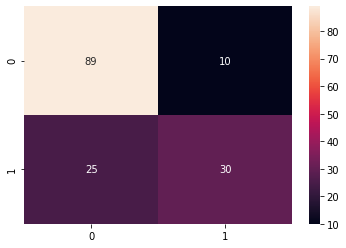

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

Confusion matrices are not restricted to binary classification problems. See the example below, which shows a graphical perspective of a confusion matrix resulting from a (ficticious) multiclass classification problem.

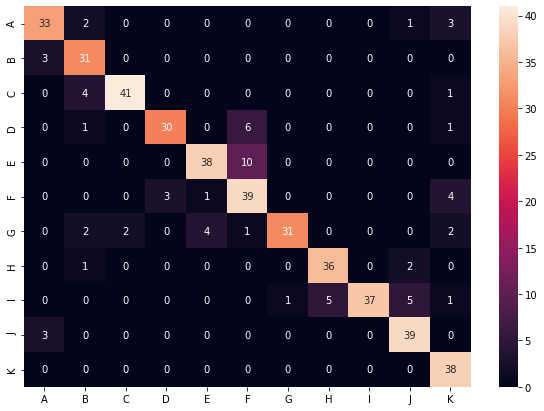

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[33,2,0,0,0,0,0,0,0,1,3], 
        [3,31,0,0,0,0,0,0,0,0,0], 
        [0,4,41,0,0,0,0,0,0,0,1], 
        [0,1,0,30,0,6,0,0,0,0,1], 
        [0,0,0,0,38,10,0,0,0,0,0], 
        [0,0,0,3,1,39,0,0,0,0,4], 
        [0,2,2,0,4,1,31,0,0,0,2],
        [0,1,0,0,0,0,0,36,0,2,0], 
        [0,0,0,0,0,0,1,5,37,5,1], 
        [3,0,0,0,0,0,0,0,0,39,0], 
        [0,0,0,0,0,0,0,0,0,0,38]]
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJK"],
                  columns = [i for i in "ABCDEFGHIJK"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Accuracy

The formal definition of the accuracy measure is the following.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$


In Scikit-Learn, the function [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) procuces the accuracy measure for a given classification model. The following example illustrates the use of this function on the model previously fitted for the [Pima Indians dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7077922077922078

## Precision, recall, $F_1$

In addition to accuracy, there are other measures of predictive performance that can be calculated from the confusion matrix.

* precision
* recall
* $F_1$ score

To understand the measures listed above, suppose that each instance is of one of two classes, as sick and healthy. Call one class P (for "positive") and the other N (for "negative"). Consider building a model to classify future instances in classes P or N using a "score" associated with the values ​​of the target attribute. For example, like the results of laboratory tests. Another example: predict whether a person is a woman knowing how many shoes they have. When the score is high (greater than some borderline value, $t$), you classify the instance in class P; when the score is small (below the limit), you classify the instance as being of class N.

Regardless of the value chosen for $t$, the model will incorrectly classify some instances (unless the data is completely separable). Suppose your male/female classification rule is "predict that someone is female if they have more than 15 pairs of shoes". For this rule, $t = 15$.

* With this rule, the model will incorrectly classify any man who has more than 15 pairs of shoes. These individuals are false positives: the rule puts them in class P (female), but they do not belong to it.

* However, the model will correctly classify women who have more than 15 pairs of shoes. These individuals are true positives: the rule puts them in class P, and that is where they belong.

### Precision

Precision is associated with the following question: "When the model predicts that an instance is positive, how often is it correct?". The expression to compute the precision of a classification model is presented below.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Precision is often the measure to optimize when the goal is to limit the number of false positives (FP) produced by the model. For example, in a spam message filtering program, this would possibly be the metric to be prioritized. That's because it is more critical to send a legitimate message to the spam box than to send a spam message to users' inbox.

### Recall

Recall is associated with the following question: "When an instance is effectively positive, how often does the classifier correctly predict this?". The expression to compute recall for a classification model is presented below.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Recall is generally used when the objective is to limit the number of false negatives (FN). For example, consider a medical exam used to detect an illness; it would be more appropriate to prioritize the building of models that maximize recall, since it is more critical to inform a patient with the disease that he does not have it.

### $F_1$ score

$F_1$ score is the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) between precision and recall. This metric should be used when both precision and recall need to be taken into account to produce a single evaluation value.

$$
F_1 = 2 \times \frac{\text{Precision} \times \text {Recall}} {\text{Precision} + \text{Recall}}
$$

## `classification_report` function

Scikit-learn provides the `classification_report` function, which produces a training evaluation report on a classification problem.

The `classification_report` function displays values for accuracy, precision, recall, F1, and support for each class.

The example below demonstrates the report produced for a binary classification problem.

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

url = "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/datasets/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, train_size=.8)

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       110
         1.0       0.78      0.57      0.66        44

    accuracy                           0.83       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.83      0.83      0.82       154



For comparison purposes, let us build another model, this time with a decision tree learning algorithm.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81       110
         1.0       0.53      0.61      0.57        44

    accuracy                           0.73       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.75      0.73      0.74       154



## Area Under the Curve (AUC)

Area under ROC Curve is a performance metric for measuring the ability of a binary classifier to discriminate between positive and negative classes.

AUC - Test Set: 81.13%


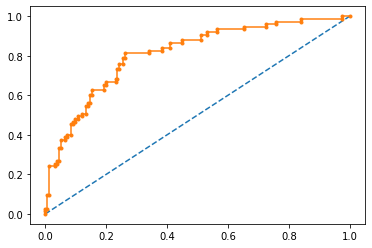

In [ ]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/datasets/pima-indians-diabetes.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7

test_size = 0.3

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Evaluation Metrics for Regression

As in the classification task, we can evaluate the predictive performance of a regression model. 


## MSE, RMSE, MAE

Three metrics are commonly used to evaluate regression models.

* Mean Squared Error
$$
\operatorname{MSE} = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h_{\Theta}(x^{(i)}))^{2}
$$

* Root Mean Squared Error (the square root of MSE).
$$
\operatorname{RMSE} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h_{\Theta}(x^{(i)}))^{2}}
$$

* Mean Absolute Error

$$
\operatorname{MAE} = \frac{1}{m}\sum_{i=1}^{m}\mid y^{(i)}-h_{\Theta}(x^{(i)}) \mid
$$

In the expressions above:

* $h_{\Theta}$ represents the regression model learned by the algorithm, that is, $h_{\Theta}(x^{(i)})$ is the predicted value for example $x^{(i)}$;
* $m$ is the amount of examples; 
* $(x^{(i)}, y^{(i)})$ is the $i$-th example.

Let us detail how the MSE measure is computed. For each of the $m$ training examples, the square of the difference between the value predicted by the model and the real value is computed first. Then, we add all these squared differences and divide by $m$ to obtain a single number. The final result is a statistic that represents the average distance between the model's predictions and the actual values. 

The following figure illustrates this calculation process. Suppose that the blue line is a regression model produced by some regression algorithm. In this case, $\operatorname{MSE}$  would produce a value that is a function of the distances of each example in the dataset (red dots) to the regressed line. These distances are depicted as green line segments. The average of the squred lengths of the green segments is the value of $\operatorname{MSE}$. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png)

In general, regression algorithms search for a setting of parameters that minimizes the value of one of the above measures.


Scikit-Learn provides functions to compute each of the evaluation metrics above, as shown in the following example. This example uses the [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) dataset, which comes with Scikit-Learn.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes_df.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object (more about that later)
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)

y_pred = regr.predict(diabetes_X_test)

print('Mean Absolute Error:', mean_absolute_error(diabetes_y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(diabetes_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(diabetes_y_test, y_pred)))

Mean Absolute Error: 41.227091289761454
Mean Squared Error: 2548.0723987259694
Root Mean Squared Error: 50.478434986892864


## R2 index

The following example ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)) uses a single predictive feature of the [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) dataset to illustrate the application of OLS regression. In the example, a two-dimensional plot is displayed that shows how linear regression attempts to fit a straight line that minimizes the *residual sum of squares* between the responses observed in the dataset and the responses predicted by the linear approximation. The coefficients, the residual sum of the squares and the variance score are also calculated.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


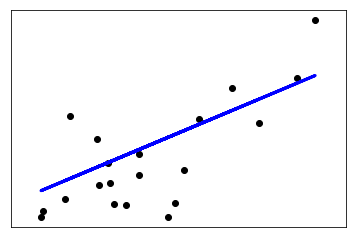

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# For simplicity's sake, use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
# NB: in a real example. train_test_split 
#     would be the appriate function to 
#     use here.
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In the example above, also note the use of the `r2_score` function. In a regression task, the value returned by this function corresponds to the variance explained by the model: 1 corresponds to the perfect prediction, and zero means that there is no linear relationship between $X$ and $y$. This value is known as the coefficient of determination and is computed using the following equation:

$$
R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}
$$

The following figure gives an intuition about the meaning of the $R^2$ score. The better the linear regression (on the right) fits the data compared to the simple average (in the graph on the left), the closer the value of $R^{2}$ will be. The areas of the blue squares ($SS_{\rm{res}}$) represent the square residues in relation to the linear regression. The areas of the red squares ($SS_{\rm{tot}}$) represent the square residues in relation to the average value.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/600px-Coefficient_of_Determination.svg.png)

The following code presents another example of using the `LinearRegression` class from Scikit-Learn, this time on the [Boston Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) dataset from Scikit-Learn. In this dataset, the target feature is the average residential price of houses of Boston districts.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load the dataset
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

print('Dimensionality of the data matrix: ', X.shape)

# Fit the regression model
regr = LinearRegression()
model = regr.fit(X_train, y_train)

# Print the fist coefficient (intercept)
print('Intercept: ', model.intercept_)

# Print other coeficients
print('Other coeficients:\n', model.coef_)

print('R^2 score on the test dataset:\n', model.score(X_test, y_test))

# Applis the model on the first five test examples.
print('Predictions for the first 5 observations in the test dataset:\n', 
      list(model.predict(X_test)[0:5]))

Dimensionality of the data matrix:  (506, 13)
Intercept:  30.246750993923925
Other coeficients:
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
R^2 score on the test dataset:
 0.6687594935356307
Predictions for the first 5 observations in the test dataset:
 [28.996723619824863, 36.02556533567223, 14.816944045388286, 25.031979150399586, 18.769879915248087]


# Final Remaks

Please notice that there many other evaluation metrics for supervised learning tasks. Some of them are: 

* True Positive Rate: proportion of positive samples that were correctly classified

* False Positive Rate: the proportion of negative samples that were incorrectly classified

* Likelihood

* Posterior probability

* Cost/utility

* Margin

* KL divergence

Also notice that unsupervised learning task (e.g., clustering methods) have their own evaluation metrics.
